## Solución de ODE's I: Ejercicios 1-4

__Ejercicio 1:__. Implementa el método de Euler en `Julia`. Debe ser de la forma `metodo_euler(f,x0,t0,tf,h)`. No olvide que no debe de utilizar `SymPy` de ningún modo en este ejercicio. Naturalmente la función `f` es de dos variables. El _output_ de la función debe ser `return listt,listx`. Otra forma quizá más inteligente de implementarlo es definir desde antes `listt`, y que los inputs del método sean de la forma: `metodo_euler(f,x0,listt)`, naturalmente en `listt` va el tiempo inicial $t_0$ y el paso $h$ que utilizará el método.

In [1]:
function metodo_euler(f,x0,t0,tf,h)
    x = x0
    lista_x = []
    push!(lista_x,x)
    lista_t = linspace(t0,tf,(tf-t0)/h+1) #Debemos de sumarle 1, si no, no da el ancho requerido
    
    for i in 2:length(lista_t)  #Empezamos en 2, el primer termino x0 ya se dió
        t = i*h
        x = x+f(x,t)*h
        push!(lista_x,x)
    end
    
    return lista_x,lista_t
end;

* Pruebe su nuevo método resolviendo la ecuación:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.

In [2]:
function f(x,t)
    -(2.5)*x
end;

In [3]:
#Probamos para cada h
metodo_euler(f,1,0,8,1)

(Any[1, -1.5, 2.25, -3.375, 5.0625, -7.59375, 11.3906, -17.0859, 25.6289], 0.0:1.0:8.0)

In [4]:
metodo_euler(f,1,0,8,0.5)

(Any[1, -0.25, 0.0625, -0.015625, 0.00390625, -0.000976563, 0.000244141, -6.10352e-5, 1.52588e-5, -3.8147e-6, 9.53674e-7, -2.38419e-7, 5.96046e-8, -1.49012e-8, 3.72529e-9, -9.31323e-10, 2.32831e-10], 0.0:0.5:8.0)

In [5]:
metodo_euler(f,1,0,8,0.2)

(Any[1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.00195313  …  4.65661e-10, 2.32831e-10, 1.16415e-10, 5.82077e-11, 2.91038e-11, 1.45519e-11, 7.27596e-12, 3.63798e-12, 1.81899e-12, 9.09495e-13], 0.0:0.2:8.0)

In [6]:
metodo_euler(f,1,0,8,0.01)

(Any[1, 0.975, 0.950625, 0.926859, 0.903688, 0.881096, 0.859068, 0.837592, 0.816652, 0.796236  …  2.00748e-9, 1.95729e-9, 1.90836e-9, 1.86065e-9, 1.81413e-9, 1.76878e-9, 1.72456e-9, 1.68145e-9, 1.63941e-9, 1.59843e-9], 0.0:0.01:8.0)

* Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. Haga una gráfica para cada condición inicial, que incluya todos los diferentes pasos usados (excepto $h=1$, este gráfiquelo aparte para cada caso), la idea aquí es ver como nos aproximamos a la solución exacta conforme tomamos $h$'s más pequeños.

Vemos que la solucion a la EDO resulta ser:

$$x= \exp{\frac{-5(c_1+t)}{2}} $$

In [8]:
using PyPlot

In [51]:
function q(x,t)
    exp.(-5t/2)
end;

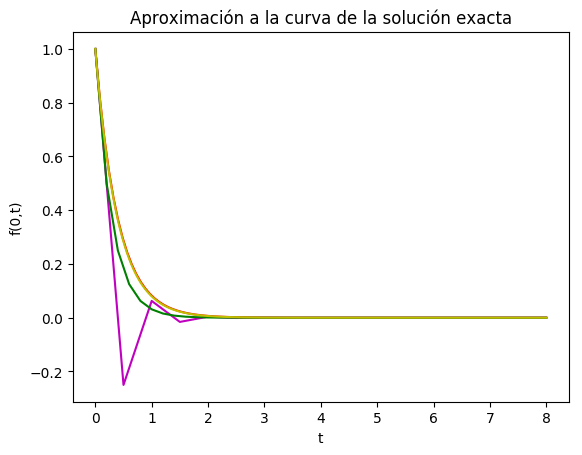

In [52]:
#Graficamos la solucion exacta junto a las aproximaciones con las h dadas a excepcion de h=1
t = linspace(0,8,100)
xlabel("t")
ylabel("f(0,t)")
title("Aproximación a la curva de la solución exacta")
plot(t,q(1,t),color="r");
plot(metodo_euler(f,1,0,8,0.5)[2],metodo_euler(f,1,0,8,0.5)[1],color="m");
plot(metodo_euler(f,1,0,8,0.2)[2],metodo_euler(f,1,0,8,0.2)[1],color="g");
plot(metodo_euler(f,1,0,8,0.01)[2],metodo_euler(f,1,0,8,0.01)[1],color="y");

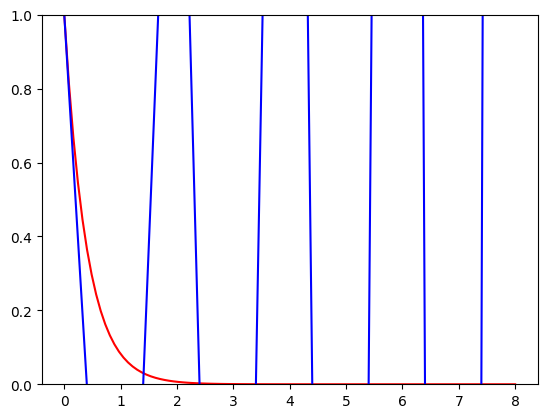

In [54]:
#En el caso de h=1
ylim(0,1)
plot(t,q(1,t),color="r");
plot(metodo_euler(f,1,0,8,1)[2],metodo_euler(f,1,0,8,1)[1],color="b");